In [3]:
import gym
import numpy as np
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

#Obtaining environment details 
# print('Number of Actions', env.action_space.n) 
# print('Number of States ', env.observation_space.n)
# print('P[10,2]', env.P[10][2])

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
#     print('Value Function',value_func)
#     print('Policy',policy_int)
#     plt.show()

test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
# fancy_visual(test_value,test_policy)

In [6]:
policy=[0]*env.observation_space.n

def policy_evaluation(policy):
    itr=5000
    V=[0]*env.observation_space.n
    for i in range(itr):
        V_new=[0]*env.observation_space.n
        for s in range(env.observation_space.n):
            for prob,nex_s,reward,_ in env.P[s][policy[s]]:
                V_new[s]+=prob*(reward+gamma*V[nex_s])
        V=V_new
    return V_new

def policy_impr(policy,V):
    policy_new=[0]*env.observation_space.n
    for s in range(env.observation_space.n):
        p_new=[0]*env.action_space.n
        for a in range(env.action_space.n):
            for prob,nex_s,reward,_ in env.P[s][a]:
                p_new[a]+=prob*(reward+gamma*V[nex_s])
        policy_new[s]=np.argmax(p_new)
    return policy_new
        
V=policy_evaluation(policy)
step_itr=20
delta=[]
for j in range(step_itr):
    policy=policy_impr(policy,V)
    V_new=policy_evaluation(policy)
    delta.append(np.linalg.norm(np.subtract(np.array(V),np.array(V_new))))
    V=V_new

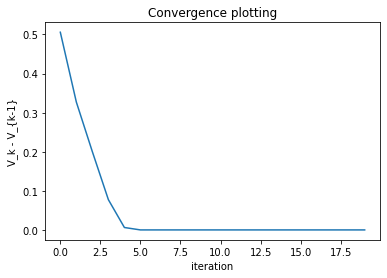

In [10]:
# plotting value V_k-V_(k-1)
plt.plot(range(len(delta)),delta)
plt.xlabel('iteration')
plt.ylabel('V_k - V_{k-1}')
plt.title('Convergence plotting')
plt.show()

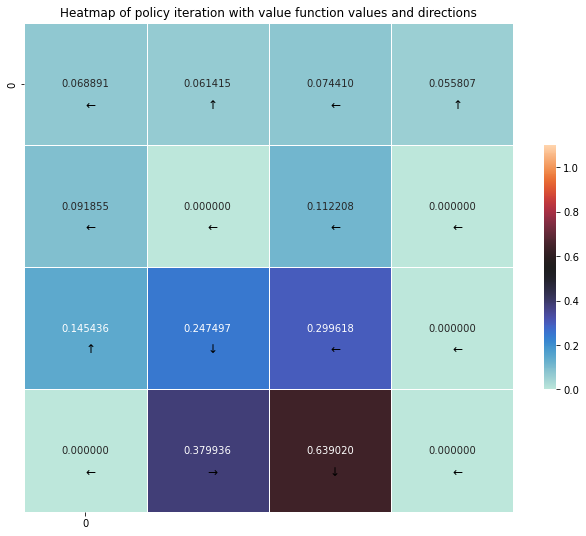

In [8]:
# plotting heat map
fancy_visual(V,policy)
plt.show()

In [9]:
print('value function:',V)    
print('policy:',policy)
Q=np.zeros((env.observation_space.n, env.action_space.n))
for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            for prob,nex_s,reward,_ in env.P[s][a]:
                Q[s][a]+=prob*(reward+gamma*V[nex_s])
print('Optimal Q value:',Q)

value function: [0.06889090488900329, 0.061414571509356086, 0.07440976196616092, 0.05580732147462067, 0.09185453985200442, 0.0, 0.11220820641168608, 0.0, 0.1454363547656737, 0.24749695460123428, 0.29961759273945937, 0.0, 0.0, 0.3799359011656479, 0.6390201481186109, 0.0]
policy: [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
Optimal Q value: [[0.0688909  0.066648   0.066648   0.05975891]
 [0.03909164 0.0429902  0.0407473  0.06141457]
 [0.07440976 0.06882903 0.07272759 0.0574895 ]
 [0.03906513 0.03906513 0.03348439 0.05580732]
 [0.09185454 0.07118727 0.06429818 0.04822363]
 [0.         0.         0.         0.        ]
 [0.11220821 0.08988528 0.11220821 0.02232293]
 [0.         0.         0.         0.        ]
 [0.07118727 0.11787999 0.10180545 0.14543635]
 [0.15761168 0.24749695 0.20386605 0.13351618]
 [0.29961759 0.26595513 0.22536851 0.10791155]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18822986 0.30568681 0.3799359  0.2659551